In [11]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'dfdffb15-9741-4a97-9ddd-2ed01aa173d4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-06-25T17:18:41.949Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 10304}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10250, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [12]:
type(data)

dict

In [13]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [14]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\sayan\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10250,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.941174e+07,1.941174e+07,False,NaN,1,NaN,NaN,None,2023-06-25T17:17:00.000Z,30607.233190,1.240071e+10,-22.7366,0.150717,0.157896,15.031733,14.064791,2.814977,12.819600,5.941396e+11,49.9535,6.427519e+11,None,2023-06-25T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 17:20:00.504750
1,1027,Ethereum,ETH,ethereum,7033,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201916e+08,1.201916e+08,True,NaN,2,NaN,NaN,None,2023-06-25T17:17:00.000Z,1892.779152,6.679464e+09,8.4561,0.261890,0.749671,8.537794,3.409349,-2.957251,10.401231,2.274962e+11,19.1272,2.274962e+11,None,2023-06-25T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 17:20:00.504750
2,825,Tether,USDT,tether,55844,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.321202e+10,8.573353e+10,True,NaN,3,NaN,NaN,None,2023-06-25T17:17:00.000Z,1.000315,2.148090e+10,-12.3995,0.005087,0.005369,0.044474,0.001773,0.032046,-0.010192,8.323823e+10,6.9987,8.576054e+10,None,2023-06-25T17:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-25 17:20:00.504750
3,1839,BNB,BNB,bnb,1468,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558522e+08,1.558522e+08,False,NaN,4,NaN,NaN,None,2023-06-25T17:17:00.000Z,239.595918,4.303876e+08,-25.4393,0.188605,2.097754,-3.031187,-21.977938,-29.988679,-23.134994,3.734155e+10,3.1396,3.734155e+10,None,2023-06-25T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 17:20:00.504750
4,3408,USD Coin,USDC,usd-coin,13092,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.847203e+10,2.847203e+10,False,NaN,5,NaN,NaN,None,2023-06-25T17:17:00.000Z,0.999995,2.708111e+09,-19.1659,0.001499,0.020863,-0.011576,0.002189,0.009198,0.029001,2.847188e+10,2.3939,2.847188e+10,None,2023-06-25T17:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-25 17:20:00.504750
5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,None,2023-06-25T17:17:00.000Z,0.491870,6.720911e+08,-19.2187,0.352975,1.039608,-0.232855,5.965126,3.181303,7.458950,2.570231e+10,2.1608,4.918699e+10,None,2023-06-25T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 17:20:00.504750
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.493548e+10,3.592148e+10,False,NaN,7,NaN,NaN,None,2023-06-25T17:17:00.000Z,0.294549,2.380038e+08,4.9556,0.333560,2.458393,9.902619,-18.158911,-29.032101,-13.979865,1.029020e+10,0.8651,1.325470e+10,None,2023-06-25T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 17:20:00.504750
7,74,Dogecoin,DOGE,dogecoin,731,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.399143e+11,1.399143e+11,True,NaN,8,NaN,NaN,None,2023-06-25T17:17:00.000Z,0.067215,1.893933e+08,-45.7280,0.368760,1.218835,6.762661,-5.166579,-18.625974,-7.158057,9.404306e+09,0.7907,9.404306e+09,None,2023-06-25T17:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 17:20:00.504750
8,5426,Solana,SOL,solana,475,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.997875e+08,

In [22]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts':'application/json',
        'X-CMC_PRO_API_KEY':'dfdffb15-9741-4a97-9ddd-2ed01aa173d4'
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url,params=parameters)
        data = json.loads(response.text)
        print(data)
    except(ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\sayan\Desktop\Data Analysis\Crypto Automation\API_Dataset.csv'):
        df.to_csv(r'C:\Users\sayan\Desktop\Data Analysis\Crypto Automation\API_Dataset.csv', header="column_names")
    else:
        df.to_csv(r'C:\Users\sayan\Desktop\Data Analysis\Crypto Automation\API_Dataset.csv', mode='a', header=False)

In [23]:
import os
from time import time
from time import sleep

for i in range(330):
    api_runner()
    print("API successfully up and running")
    sleep(60)
exit()    

{'status': {'timestamp': '2023-06-25T18:39:02.863Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 10289}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10250, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Users\sayan\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


KeyboardInterrupt: 

In [24]:
df72 = pd.read_csv(r'C:\Users\sayan\Desktop\Data Analysis\Crypto Automation\API_Dataset.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10250,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.941182e+07,1.941182e+07,False,NaN,1,NaN,NaN,NaN,2023-06-25T18:37:00.000Z,30406.363200,1.259602e+10,-15.1472,-0.603365,-0.868695,14.324415,13.800509,2.119286,12.263798,5.902430e+11,49.8712,6.385336e+11,NaN,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
1,1,1027,Ethereum,ETH,ethereum,7033,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201916e+08,1.201916e+08,True,NaN,2,NaN,NaN,NaN,2023-06-25T18:37:00.000Z,1889.015787,6.753925e+09,15.5069,-0.149340,0.093065,8.650517,3.226242,-3.044977,10.194816,2.270439e+11,19.1835,2.270439e+11,NaN,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
2,2,825,Tether,USDT,tether,55844,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.321202e+10,8.573353e+10,True,NaN,3,NaN,NaN,NaN,2023-06-25T18:37:00.000Z,1.000470,2.162834e+10,-7.2797,-0.014466,-0.011688,0.061848,0.011007,0.047204,0.006305,8.325117e+10,7.0397,8.577386e+10,NaN,2023-06-25T18:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-25 18:40:11.974156
3,3,1839,BNB,BNB,bnb,1468,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558522e+08,1.558522e+08,False,NaN,4,NaN,NaN,NaN,2023-06-25T18:37:00.000Z,237.479241,4.307767e+08,-24.1024,-0.502135,0.834881,-3.428908,-22.510558,-30.396107,-22.795775,3.701165e+10,3.1272,3.701165e+10,NaN,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
4,4,3408,USD Coin,USDC,usd-coin,13092,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.847203e+10,2.847203e+10,False,NaN,5,NaN,NaN,NaN,2023-06-25T18:37:00.000Z,0.999961,2.752892e+09,-11.1442,-0.030134,-0.012144,-0.019061,-0.008387,0.011793,0.021653,2.847091e+10,2.4075,2.847091e+10,NaN,2023-06-25T18:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-25 18:40:11.974156
5,5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,NaN,2023-06-25T18:37:00.000Z,0.488378,6.838125e+08,-13.6254,-0.417466,0.240866,-0.590213,5.241777,2.171850,4.525266,2.551983e+10,2.1558,4.883777e+10,NaN,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
6,6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.493548e+10,3.592148e+10,False,NaN,7,NaN,NaN,NaN,2023-06-25T18:37:00.000Z,0.292623,2.371640e+08,8.1251,-0.402799,1.174640,9.484765,-19.557653,-29.122072,-14.587087,1.022292e+10,0.8636,1.316802e+10,NaN,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
7,7,74,Dogecoin,DOGE,dogecoin,731,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.399155e+11,1.399155e+11,True,NaN,8,NaN,NaN,NaN,2023-06-25T18:37:00.000Z,0.066709,1.930627e+08,-36.8219,-0.567842,0.222441,6.392466,-5.749584,-18.923497,-8.065579,9.333639e+09,0.7886,9.333639e+09,NaN,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
8,8,5426,Solana,SOL,solana,475,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms

In [25]:
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [26]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10250,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19411825.000000,19411825.000000,False,NaN,1,NaN,NaN,None,2023-06-25T18:37:00.000Z,30406.363200,12596017426.905781,-15.147200,-0.603365,-0.868695,14.324415,13.800509,2.119286,12.263798,590243001320.568970,49.871200,638533627195.380005,None,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
1,1027,Ethereum,ETH,ethereum,7033,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120191632.878828,120191632.878828,True,NaN,2,NaN,NaN,None,2023-06-25T18:37:00.000Z,1889.015787,6753925443.946944,15.506900,-0.149340,0.093065,8.650517,3.226242,-3.044977,10.194816,227043891985.395325,19.183500,227043891985.399994,None,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
2,825,Tether,USDT,tether,55844,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83212018333.016907,85733529362.307053,True,NaN,3,NaN,NaN,None,2023-06-25T18:37:00.000Z,1.000470,21628337593.333916,-7.279700,-0.014466,-0.011688,0.061848,0.011007,0.047204,0.006305,83251167563.510086,7.039700,85773864902.399994,None,2023-06-25T18:37:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-25 18:40:11.974156
3,1839,BNB,BNB,bnb,1468,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155852163.061682,155852163.061682,False,NaN,4,NaN,NaN,None,2023-06-25T18:37:00.000Z,237.479241,430776670.099251,-24.102400,-0.502135,0.834881,-3.428908,-22.510558,-30.396107,-22.795775,37011653376.839340,3.127200,37011653376.839996,None,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
4,3408,USD Coin,USDC,usd-coin,13092,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28472030219.589668,28472030219.589668,False,NaN,5,NaN,NaN,None,2023-06-25T18:37:00.000Z,0.999961,2752891725.368341,-11.144200,-0.030134,-0.012144,-0.019061,-0.008387,0.011793,0.021653,28470911615.039551,2.407500,28470911615.040001,None,2023-06-25T18:37:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-25 18:40:11.974156
5,52,XRP,XRP,xrp,969,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,52254289650.000000,99988655562.000000,False,NaN,6,NaN,NaN,None,2023-06-25T18:37:00.000Z,0.488378,683812520.622465,-13.625400,-0.417466,0.240866,-0.590213,5.241777,2.171850,4.525266,25519832221.676067,2.155800,48837774645.120003,None,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
6,2010,Cardano,ADA,cardano,842,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,34935476074.443001,35921478500.889000,False,NaN,7,NaN,NaN,None,2023-06-25T18:37:00.000Z,0.292623,237163990.992313,8.125100,-0.402799,1.174640,9.484765,-19.557653,-29.122072,-14.587087,10222915218.954897,0.863600,13168023927.100000,None,2023-06-25T18:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-25 18:40:11.974156
7,74,Dogecoin,DOGE,dogecoin,731,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139915466383.705231,139915466383.705231,True,NaN,8,NaN,NaN,None,2023-06-25T18:37:00.000Z,0.066709,193062665.321332,-36.821900,-0.567842,0.222

In [27]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.603365,-0.868695,14.324415,13.800509,2.119286,12.263798
Ethereum,-0.149340,0.093065,8.650517,3.226242,-3.044977,10.194816
Tether,-0.014466,-0.011688,0.061848,0.011007,0.047204,0.006305
BNB,-0.502135,0.834881,-3.428908,-22.510558,-30.396107,-22.795775
USD Coin,-0.030134,-0.012144,-0.019061,-0.008387,0.011793,0.021653
XRP,-0.417466,0.240866,-0.590213,5.241777,2.171850,4.525266
Cardano,-0.402799,1.174640,9.484765,-19.557653,-29.122072,-14.587087
Dogecoin,-0.567842,0.222441,6.392466,-5.749584,-18.923497,-8.065579
Solana,-0.376967,2.599239,8.450851,-12.063584,-25.034957,-14.275679


In [28]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h    -0.603365
                 quote.USD.percent_change_24h   -0.868695
                 quote.USD.percent_change_7d    14.324415
                 quote.USD.percent_change_30d   13.800509
                 quote.USD.percent_change_60d    2.119286
                                                   ...   
Wrapped Bitcoin  quote.USD.percent_change_24h   -0.611355
                 quote.USD.percent_change_7d    14.391343
                 quote.USD.percent_change_30d   13.830607
                 quote.USD.percent_change_60d    2.297673
                 quote.USD.percent_change_90d   12.303490
Length: 90, dtype: float64

In [29]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h  -0.603365
                quote.USD.percent_change_24h -0.868695
                quote.USD.percent_change_7d  14.324415
                quote.USD.percent_change_30d 13.800509
                quote.USD.percent_change_60d  2.119286
...                                                ...
Wrapped Bitcoin quote.USD.percent_change_24h -0.611355
                quote.USD.percent_change_7d  14.391343
                quote.USD.percent_change_30d 13.830607
                quote.USD.percent_change_60d  2.297673
                quote.USD.percent_change_90d 12.303490

[90 rows x 1 columns]

In [30]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.603365
1,Bitcoin,quote.USD.percent_change_24h,-0.868695
2,Bitcoin,quote.USD.percent_change_7d,14.324415
3,Bitcoin,quote.USD.percent_change_30d,13.800509
4,Bitcoin,quote.USD.percent_change_60d,2.119286
...,...,...,...
85,Wrapped Bitcoin,quote.USD.percent_change_24h,-0.611355
86,Wrapped Bitcoin,quote.USD.percent_change_7d,14.391343
87,Wrapped Bitcoin,quote.USD.percent_change_30d,13.830607
88,Wrapped Bitcoin,quote.USD.percent_change_60d,2.297673


In [33]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.603365
1,Bitcoin,quote.USD.percent_change_24h,-0.868695
2,Bitcoin,quote.USD.percent_change_7d,14.324415
3,Bitcoin,quote.USD.percent_change_30d,13.800509
4,Bitcoin,quote.USD.percent_change_60d,2.119286
...,...,...,...
85,Wrapped Bitcoin,quote.USD.percent_change_24h,-0.611355
86,Wrapped Bitcoin,quote.USD.percent_change_7d,14.391343
87,Wrapped Bitcoin,quote.USD.percent_change_30d,13.830607
88,Wrapped Bitcoin,quote.USD.percent_change_60d,2.297673


In [37]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.603365
1,Bitcoin,24h,-0.868695
2,Bitcoin,7d,14.324415
3,Bitcoin,30d,13.800509
4,Bitcoin,60d,2.119286
...,...,...,...
85,Wrapped Bitcoin,24h,-0.611355
86,Wrapped Bitcoin,7d,14.391343
87,Wrapped Bitcoin,30d,13.830607
88,Wrapped Bitcoin,60d,2.297673


In [40]:
df8 = df7[['name','percent_change','values']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,percent_change,values
0,Bitcoin,1h,-0.603365
1,Bitcoin,24h,-0.868695
2,Bitcoin,7d,14.324415
3,Bitcoin,30d,13.800509
4,Bitcoin,60d,2.119286
5,Bitcoin,90d,12.263798


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

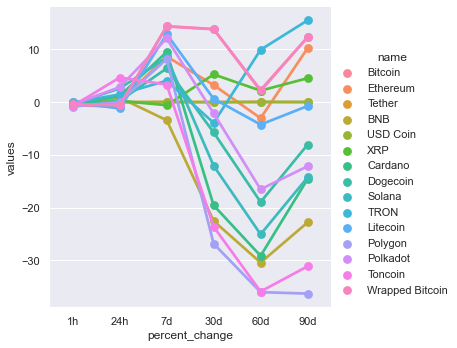

In [43]:
sns.set_theme(style="darkgrid")
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

<AxesSubplot:xlabel='percent_change', ylabel='values'>

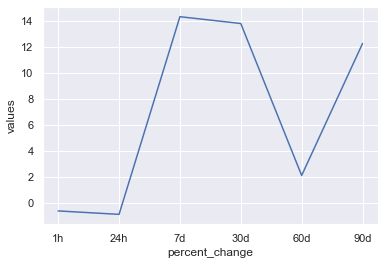

In [42]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='percent_change', y='values', data=df8) #Bitcoin specific

In [46]:
df9 = df7[['name','percent_change','values']]
df9 = df7.head(12)
df9

,name,percent_change,values
0,Bitcoin,1h,-0.603365
1,Bitcoin,24h,-0.868695
2,Bitcoin,7d,14.324415
3,Bitcoin,30d,13.800509
4,Bitcoin,60d,2.119286
5,Bitcoin,90d,12.263798
6,Ethereum,1h,-0.149340
7,Ethereum,24h,0.093065
8,Ethereum,7d,8.650517
9,Ethereum,30d,3.226242


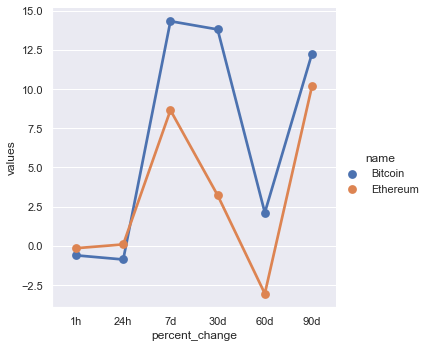

In [47]:
sns.set_theme(style="darkgrid")
sns.catplot(x='percent_change', y='values', hue='name', data=df9, kind='point') #Bitcoin VS Ethereum